<a href="https://colab.research.google.com/github/Sharon-n789/Classification_CNN/blob/main/Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification CNN Model**


---


This project uses a Convolutional Neural Network (CNN) to classify images of cats and dogs.

It trains on labeled image data, then evaluates performance by showing accuracy and loss metrics over the training process.

# Initial Steps for dataset uploading
* Creates a hidden directory named `.kaggle` inside your home folder.
* Copies the `kaggle.json` file (your Kaggle API credentials) into that `.kaggle` directory.
* This file is needed to authenticate with *Kaggle’s API*.
* Uses the *Kaggle CLI* to download a dataset and specifies the dataset’s identifier *(owner/dataset-name)* from Kaggle.
* The Kaggle API authenticates using `~/.kaggle/kaggle.json`.
* It downloads the dataset as a **ZIP file** `(dogs-vs-cats.zip)` into your current working directory `(/content)`.
* Then you *extract* all the files from the **ZIP folder** by using the `zipfile module`

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 95% 1.01G/1.06G [00:07<00:00, 154MB/s]
100% 1.06G/1.06G [00:07<00:00, 148MB/s]


In [3]:
import zipfile

In [4]:
zip_file = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_file.extractall('/content')
zip_file.close()

# Importing Models
We *import* the required libraries to build and train the classification model.

Since a **Convolutional Neural Network (CNN)** is used, we leverage `Keras` from `TensorFlow` for model creation, training, and result evaluation.

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

# Loading into Tensorflow
Loading the images from folders into TensorFlow datasets for training and validation.

* **directory**=`'/content/train'`
Path to the folder containing training images.
Inside this folder, images should be organized into subfolders, one per class (e.g., /content/train/dog/ and /content/train/cat/).

* **labels**=`'inferred'`
Automatically assigns labels based on subfolder names.

* **label_mode**=`'int'`
Labels are returned as integers *(e.g., 0 for cat, 1 for dog)*.

* **batch_size**= `32`
The dataset will load images in batches of 32, useful for training.

* **image_size**= `(256,256)`
All images are resized to 256×256 pixels. As all the images are of different sizes.

In [6]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# Normalization
The Main purpose of Normalization is convert image pixel values from **0–255** to a range of **0–1**, which helps CNNs train better and faster.

As there are only 2 entity - cat and dog

In [7]:
# Normalization
def norm_process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset = train_dataset.map(norm_process)
validation_dataset = validation_dataset.map(norm_process)

# CNN Model Building
* Here, CNN Model is created by using 3 Convolutional Layers and Max Pooling Layers

* Flatten Layer is added after it.

* And then Dense Layer at last.

* Summary is provided in the cell below.

In [8]:
# CNN Model Making

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

# Compile and Train


---


1. Compiling the Model
    * **optimizer**=`'adam'`
    
    Adam is an **adaptive learning rate optimizer** that works well in most deep learning tasks.
    * **loss**=`'binary_crossentropy'`
    
    Since **2 classes (cats vs dogs)**, binary crossentropy is the correct loss function.

    * metrics=['accuracy']
    
    Tracks **classification accuracy** during *training* and *validation*.
2. Training the Model
  * `train_dataset`: **Training data (20,000 images)**.

  * `epochs`= **10**: The dataset is processed 10 times.

  * `validation_data= validation_dataset`: Used to check model performance after *each epoch without updating weights*.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 87ms/step - accuracy: 0.5948 - loss: 0.6887 - val_accuracy: 0.6542 - val_loss: 0.6319
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 78ms/step - accuracy: 0.7042 - loss: 0.5644 - val_accuracy: 0.7690 - val_loss: 0.4866
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7756 - loss: 0.4615 - val_accuracy: 0.7758 - val_loss: 0.5010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8518 - loss: 0.3363 - val_accuracy: 0.7628 - val_loss: 0.6601
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9244 - loss: 0.1822 - val_accuracy: 0.7554 - val_loss: 1.1116
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 81ms/step - accuracy: 0.9596 - loss: 0.1044 - val_accuracy: 0.7616 - val_loss: 1.2415
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 76ms/step - accuracy: 0.9745 - loss: 0.0773 - val_accuracy: 0.7616 - val_loss: 1.4457
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.9811 - loss: 0.0618 - 

# Result Inspection from the Graphs


---


From the Graphs below we can say that **"Overfitting"** is taking place.

As we can see that in *training set*, model is working good but in *validation set* the model is not showing the good result.

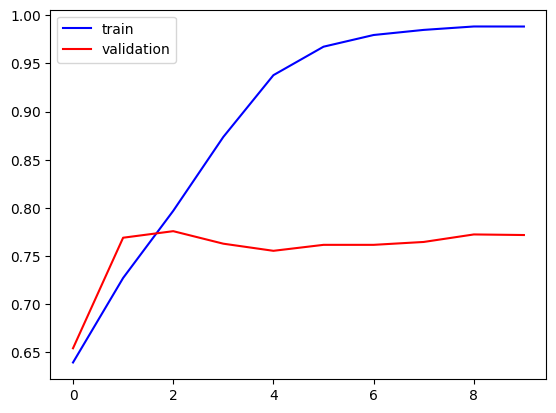

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='blue',label='train')
plt.plot(history.history['val_accuracy'], color='red',label='validation')
plt.legend()
plt.show()

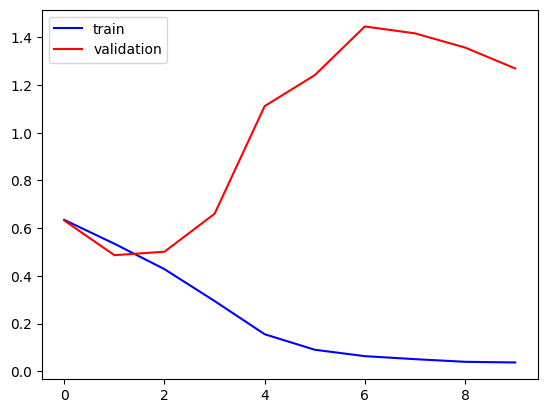

In [14]:
plt.plot(history.history['loss'], color='blue',label='train')
plt.plot(history.history['val_loss'], color='red',label='validation')
plt.legend()
plt.show()

# Overfitting Reduction
We would be using the techique of **Batch Normalization** and **Dropout** to reduce the problem of overfitting.

**Again model building, compiling and training on new model sequential.**

In [10]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
new_history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 91ms/step - accuracy: 0.5621 - loss: 2.6845 - val_accuracy: 0.6762 - val_loss: 0.6166
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.6557 - loss: 0.6218 - val_accuracy: 0.6280 - val_loss: 0.6268
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7121 - loss: 0.5415 - val_accuracy: 0.7404 - val_loss: 0.5144
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7533 - loss: 0.4691 - val_accuracy: 0.7896 - val_loss: 0.4650
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.7996 - loss: 0.4184 - val_accuracy: 0.7922 - val_loss: 0.4564
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.8258 - loss: 0.3645 - val_accuracy: 0.6574 - val_loss: 0.7142
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8423 - loss: 0.3320 - val_accuracy: 0.8070 - val_loss: 0.4671
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.8746 - loss: 0.2627 - 

# Improved Results
As you can see now, the difference between the *training set* and *validation set* is decreased than earlier.

We can further improve by using some other methods like **L1/L2 Regularization**.

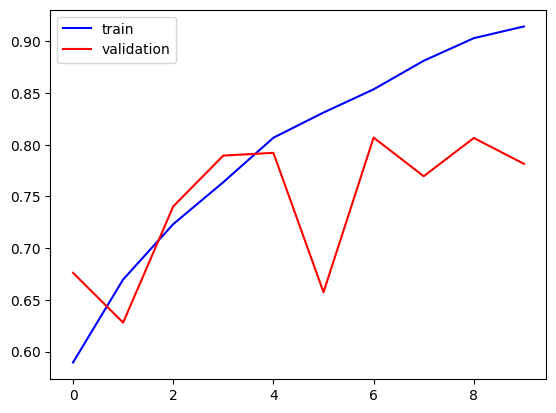

In [16]:
import matplotlib.pyplot as plt

plt.plot(new_history.history['accuracy'], color='blue',label='train')
plt.plot(new_history.history['val_accuracy'], color='red',label='validation')
plt.legend()
plt.show()

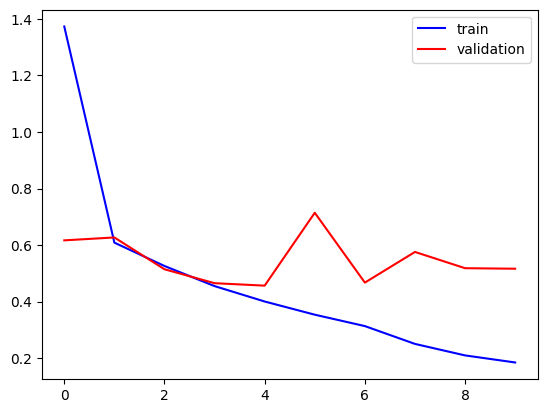

In [17]:
plt.plot(new_history.history['loss'], color='blue',label='train')
plt.plot(new_history.history['val_loss'], color='red',label='validation')
plt.legend()
plt.show()